## Meyer-Wallach measure

In [1]:
import qiskit
import numpy as np
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit import Aer, quantum_info

- Meyer-Wallach measure

$$
    Q=\frac{2}{|S|}\sum_{\theta_i\in S}\Big(1- \frac{1}{n}\sum_{k=1}^{n}Tr(\rho_k^2(\theta_i))\Big)
$$

where $\rho_k$ is the one-qubit reduced density matrix of the kth qubit after tracing out the rest.

In [2]:
def mw_measure(pqc, num_qubits, params_num, sample=1024):
    """
    Returns the meyer-wallach entanglement measure for the given circuit. 
    """

    temp = np.zeros(sample, dtype=complex)
    N = num_qubits

    for i in range(sample):
        params = np.random.uniform(-np.pi, np.pi, params_num)
        ansatz = pqc(num_qubits,params_num).bind_parameters(params)
        backend = Aer.get_backend('statevector_simulator')
        job = backend.run(ansatz)
        result = job.result()
        U = result.get_statevector(ansatz, decimals=5)
        entropy = 0
        qb_list = list(range(N))

        # rho_k after tracing out the rest
        for j in range(N):
            rest = qb_list[:j]+qb_list[j+1:]
            dens = quantum_info.partial_trace(U, rest).data          
            trace = np.trace(np.matmul(dens,dens)) # rho_k^2
            entropy += trace
            
        entropy /= N    
        temp[i] = 1.0 - entropy

    # meyer-wallach measure
    Q = 2*np.sum(temp).real/sample
    
    return Q
    

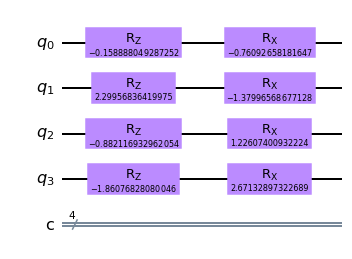

In [3]:
def pqc0(num_qubits, params_num): 

    ansatz = QuantumCircuit(num_qubits, num_qubits)
    
    # parameters
    theta_param = []
    for i in range(params_num):
        theta_param.append(Parameter('theta%s'%i))
    
    # PQC
    for idx in range(num_qubits):
        ansatz.rz(theta_param[idx], idx)
    for idx in range(num_qubits):
        ansatz.rx(theta_param[idx+num_qubits], idx)

    return ansatz

# draw circuit
num_qubits = 4
params_num = 8
circ = pqc0(num_qubits,params_num).bind_parameters( np.random.uniform(-np.pi, np.pi,8))
circ.draw('mpl')

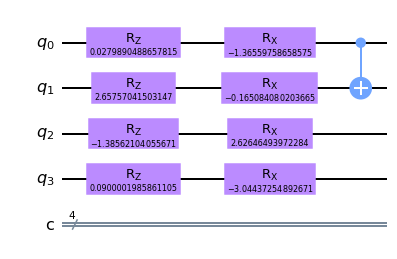

In [4]:
def pqc1(num_qubits, params_num): 

    ansatz = QuantumCircuit(num_qubits, num_qubits)
    
    # parameters
    theta_param = []
    for i in range(params_num):
        theta_param.append(Parameter('theta%s'%i))
    
    # PQC
    for idx in range(num_qubits):
        ansatz.rz(theta_param[idx], idx)
    for idx in range(num_qubits):
        ansatz.rx(theta_param[idx+num_qubits], idx)
    ansatz.cnot(0, 1)  

    return ansatz

# draw circuit
num_qubits = 4
params_num = 8
circ = pqc1(num_qubits,params_num).bind_parameters( np.random.uniform(-np.pi, np.pi,8))
circ.draw('mpl')

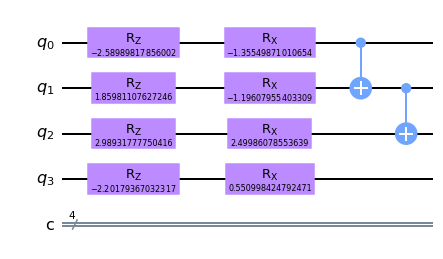

In [5]:
def pqc2(num_qubits, params_num): 

    ansatz = QuantumCircuit(num_qubits, num_qubits)
    
    # parameters
    theta_param = []
    for i in range(params_num):
        theta_param.append(Parameter('theta%s'%i))
    
    # PQC
    for idx in range(num_qubits):
        ansatz.rz(theta_param[idx], idx)
    for idx in range(num_qubits):
        ansatz.rx(theta_param[idx+num_qubits], idx)
    ansatz.cnot(0, 1)
    ansatz.cnot(1, 2)

    return ansatz

# draw circuit
num_qubits = 4
params_num = 8
circ = pqc2(num_qubits,params_num).bind_parameters( np.random.uniform(-np.pi, np.pi,8))
circ.draw('mpl')

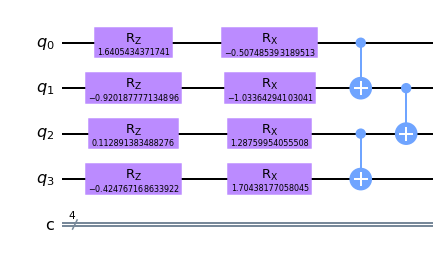

In [6]:
def pqc3(num_qubits, params_num): 

    ansatz = QuantumCircuit(num_qubits, num_qubits)
    
    # parameters
    theta_param = []
    for i in range(params_num):
        theta_param.append(Parameter('theta%s'%i))
    
    # PQC
    for idx in range(num_qubits):
        ansatz.rz(theta_param[idx], idx)
    for idx in range(num_qubits):
        ansatz.rx(theta_param[idx+num_qubits], idx)

    ansatz.cnot(0, 1)
    ansatz.cnot(2, 3)
    ansatz.cnot(1, 2)        
        
    return ansatz
    

# draw circuit
num_qubits = 4
params_num = 8
circ = pqc3(num_qubits,params_num).bind_parameters( np.random.uniform(-np.pi, np.pi,8))
circ.draw('mpl')

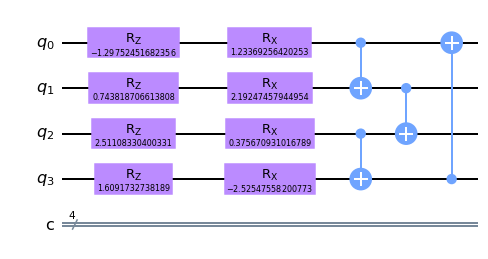

In [7]:
def pqc4(num_qubits, params_num): 

    ansatz = QuantumCircuit(num_qubits, num_qubits)
    
    # parameters
    theta_param = []
    for i in range(params_num):
        theta_param.append(Parameter('theta%s'%i))
    
    # PQC
    for idx in range(num_qubits):
        ansatz.rz(theta_param[idx], idx)
    for idx in range(num_qubits):
        ansatz.rx(theta_param[idx+num_qubits], idx)

    ansatz.cnot(0, 1)
    ansatz.cnot(2, 3)
    ansatz.cnot(1, 2)  
    ansatz.cnot(3, 0)      
        
    return ansatz
    

# draw circuit
num_qubits = 4
params_num = 8
circ = pqc4(num_qubits,params_num).bind_parameters( np.random.uniform(-np.pi, np.pi,8))
circ.draw('mpl')

In [8]:
ent0 = mw_measure(pqc0,num_qubits,params_num)
ent1 = mw_measure(pqc1,num_qubits,params_num)
ent2 = mw_measure(pqc2,num_qubits,params_num)
ent3 = mw_measure(pqc3,num_qubits,params_num)
ent4 = mw_measure(pqc4,num_qubits,params_num)

### entangling capability

<BarContainer object of 5 artists>

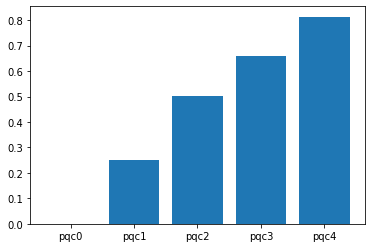

In [9]:
left = np.array(['pqc0','pqc1', 'pqc2', 'pqc3','pqc4'])
height = np.array([ent0,ent1,ent2, ent3,ent4])
plt.bar(left, height)

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table